<h1>Tree of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1">INTRODUCTION</a></span></li><li><span><a href="#DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH." data-toc-modified-id="DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH.-2">DEDUCTIONS FROM THE PREVIOUS RESEARCH.</a></span></li><li><span><a href="#ASSUMPTIONS" data-toc-modified-id="ASSUMPTIONS-3">ASSUMPTIONS</a></span></li><li><span><a href="#TACKLING-ASSUMPTIONS" data-toc-modified-id="TACKLING-ASSUMPTIONS-4">TACKLING ASSUMPTIONS</a></span><ul class="toc-item"><li><span><a href="#Investigating-Relationships-between-features" data-toc-modified-id="Investigating-Relationships-between-features-4.1">Investigating Relationships between features</a></span></li><li><span><a href="#Checking-Collinearity" data-toc-modified-id="Checking-Collinearity-4.2">Checking Collinearity</a></span></li><li><span><a href="#Checking-for-Class-Imbalance" data-toc-modified-id="Checking-for-Class-Imbalance-4.3">Checking for Class Imbalance</a></span></li><li><span><a href="#Checking-for-Outliers" data-toc-modified-id="Checking-for-Outliers-4.4">Checking for Outliers</a></span><ul class="toc-item"><li><span><a href="#Checking-for-outliers-using-DBSCAN." data-toc-modified-id="Checking-for-outliers-using-DBSCAN.-4.4.1">Checking for outliers using DBSCAN.</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#A.-Interactions-among-Features" data-toc-modified-id="A.-Interactions-among-Features-5.1">A. Interactions among Features</a></span></li><li><span><a href="#B.-Dimensionality-reduction-using-PCA" data-toc-modified-id="B.-Dimensionality-reduction-using-PCA-5.2">B. Dimensionality reduction using PCA</a></span></li></ul></li></ul></div>

## INTRODUCTION
In my previous research, I trained a **Logistic Regression** model with data that I hadn't extensively preprocessed. I did not follow any of the assumptions with regards to using Logistic Regression, and I was able to achieve an accuracy of about 80%. In this notebook however I will follow the assumptions, and observe how my model performs.

## DEDUCTIONS FROM THE PREVIOUS RESEARCH.
- With k-fold cross validation, I only achieved an accuracy of 80% on the test set.
- With the learning curve, I was able to tell that adding more training samples won't do any good.
- With the learning curve, I was also able to tell that the model totally "underfits" the data.
- With the validation curve, I was also able to tell that our model didn't do too well with variations in regularization strength.
- We noticed that there was large imbalance in our classes with about an 80:20 ratio.
- With the confusion matrix, I was able to tell the number of misclassified samples.

## ASSUMPTIONS

- Logisitic regression does not **require a linear relationship** between the dependent and independent variable.
- **Homoscedasticity** is not required unlike in linear regression.
- The dependent variable is **not** measured on an interval.
- Observations must be **independent** of each other, in other words, observations should not come from repeated measurements or matched data.
- Logistic regression assumes **linearity of independent variables and log odds**.
- The dependent variable should be **dichotomous** in nature.
- It works well when there are **no outliers** in your data.
- It also works well when there is **no multicollinearity** in our predictors. 
- The dataset must be **linearly seperable**.
- Logistic regression works well with a **balance in class distribution**.

## TACKLING ASSUMPTIONS

### Investigating Relationships between features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## grabbing the data
data = pd.read_csv('Churn_Modelling.csv')

## dropping 3 features
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

## encoding categorical features
geo_dict = {val:idx for idx, val in enumerate(np.unique(data['Geography'].values))}
gen_dict = { val : idx for idx, val in enumerate(np.unique(data['Gender'].values))}

## mapping 
data['Geography'] = data['Geography'].map(geo_dict)
data['Gender'] = data['Gender'].map(gen_dict)

## this is where seaborn's pairplot() function shines

##sns.pairplot(data)
data.head()




We can tell from our plot that some of the features are linearly separable where as some are not.

### Checking Collinearity

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
cols = data.columns
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 15}, yticklabels=cols, xticklabels=cols)
plt.show()

It can be seen that the strength of collinearity is indeed very weak with the highest being 0.3 (Balance and NumOfProducts)

### Checking for Class Imbalance

In [ ]:
## let's count the number of customers who have churned as well as those who haven't
data = pd.read_csv('Churn_Modelling.csv')
exited = np.array(data['Exited'].values)
churned = np.sum(exited == 1).astype(int)
not_churned = np.sum(exited == 0).astype(int)
total = churned + not_churned
print('The percentage of customers that churned: %.3f%%' % (churned/total * 100))
print('The percentage of customers that did not churned: {}%'.format(not_churned/total * 100))
print('the total number of samples: %d' % int(total))

There is a huge imbalance in the distribution of our class.

### Checking for Outliers

There are various ways to test for outliers in our data however in this notebook, I'll explore **1 multivariate method** and **1 univariate method** - **DBSCAN (Density Clustering)** and the **Tukey Method using a box plot** respectively.

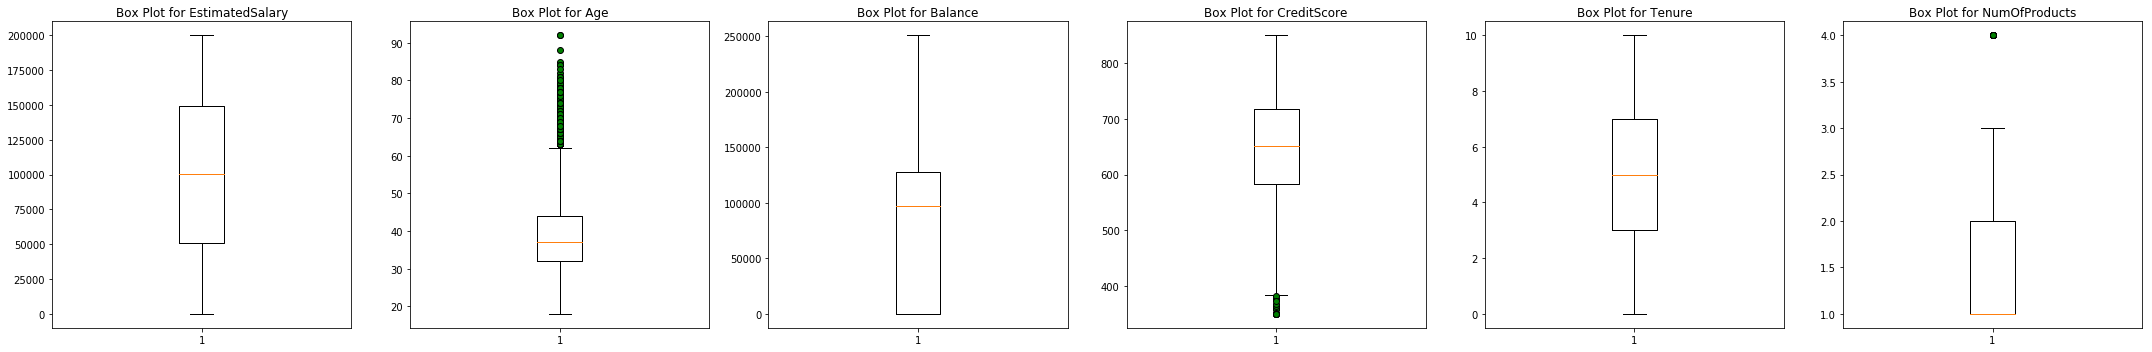

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

employee_df = pd.read_csv('Churn_Modelling.csv')
employee_df = employee_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

## encoding categorical features
geo_dict = {val:idx for idx, val in enumerate(np.unique(employee_df['Geography'].values))}
gen_dict = { val : idx for idx, val in enumerate(np.unique(employee_df['Gender'].values))}

employee_df['Geography'] = employee_df['Geography'].map(geo_dict)
employee_df['Gender'] = employee_df['Gender'].map(gen_dict)

features = ['EstimatedSalary', 'Age', 'Balance', 'CreditScore', 'Tenure', 'NumOfProducts']

green_diamond = dict(markerfacecolor='g', marker='o')


fig, axes = plt.subplots(1, len(features), figsize=(30, 5))
for feature in features:
        axes[features.index(feature)].boxplot(employee_df[feature], flierprops=green_diamond)
        axes[features.index(feature)].set_title('Box Plot for %s' % feature, loc='center', pad=5 )
        plt.tight_layout()
plt.show()




Looks like we have the most Outliers in the **Age** feature, with the **Credit Scores** to follow. The **Number of Products feature** has just an outlier.

#### Checking for outliers using DBSCAN.

**DBSCAN - Density Based Spatial Clustering of Applications with Noise**, assigns cluster labels based on **dense regions of points**. In DBSCAN, the notion of density is density is defined as the number of points within a specified radius, **r**.

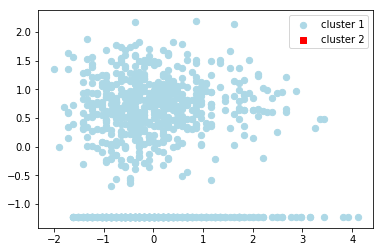

In [38]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = np.array(employee_df[['Age', 'Balance']])
sc = StandardScaler()
X_std = sc.fit_transform(X)
# plt.scatter(X_std[:900, 0], X_std[:900, 1])
db = DBSCAN(eps=0.4, min_samples=20, metric='euclidean')
y_db = db.fit_predict(X_std)
plt.scatter(X_std[y_db == 0, 0][:900], X_std[y_db == 0, 1][:900], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X_std[y_db == 1, 0][:900], X_std[y_db == 1, 1][:900], c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()

This is super inaccurate and i am hoping that someone can help me with this.

## Feature Engineering

Essentially, increasing or decreasing dimensionality. 
### A. Interactions among Features

- A simple two-way interaction is represented by:
     - X3 = X1 * X2 where X3 is the interaction between X1 and X2.

- Can add interaction terms as additional new features to your model; useful for model if the impact of two or more features on the outcome is non-additive.

- Note that interactions amongst dummy variables belonging to the same categorical feature are always zero.

Although it is very easy to calculate two-way interactions amongst all features, it is very computationally expensive
- 10 features = 45 two-way interaction terms
- 50 features = 1,225 two-way interaction terms
- 100 features = 4,950 two-way interaction terms
- 500 features = 124,750 two-way interaction terms
- Recommend understanding your data and domain if possible and selectively choosing   interaction terms.

In [46]:
## Use PolynomialFeatures in sklearn.preprocessing to creat two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + [' '.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    ## Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [47]:
employee_df = add_interactions(employee_df)
employee_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Balance NumOfProducts,Balance HasCrCard,Balance IsActiveMember,Balance EstimatedSalary,NumOfProducts HasCrCard,NumOfProducts IsActiveMember,NumOfProducts EstimatedSalary,HasCrCard IsActiveMember,HasCrCard EstimatedSalary,IsActiveMember EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,...,0.00,0.00,0.00,0.000000e+00,1.0,1.0,101348.88,1.0,101348.88,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,...,83807.86,0.00,83807.86,9.431953e+09,0.0,1.0,112542.58,0.0,0.00,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,...,478982.40,159660.80,0.00,1.819041e+10,3.0,0.0,341794.71,0.0,113931.57,0.00
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,...,0.00,0.00,0.00,0.000000e+00,0.0,0.0,187653.26,0.0,0.00,0.00
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,...,125510.82,125510.82,125510.82,9.925910e+09,1.0,1.0,79084.10,1.0,79084.10,79084.10


### B. Dimensionality reduction using PCA 